In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
def merge_datasets(path_down, path_up, merged_df_path, rows=[]):
    down = pd.read_csv(path_down, sep="\t")
    down.columns = rows
    up = pd.read_csv(path_up, sep="\t")
    up.columns = rows
    new_df = pd.concat([down, up])
    new_df.to_csv(merged_df_path, sep="\t", index=False)
    return new_df

def prepare_data(file_path):
    norm_genes = pd.read_csv(file_path, sep="\t")
    y_labels = norm_genes["Genes"].tolist()
    norm_genes = norm_genes.drop(columns=['Genes'])
    return norm_genes, y_labels

In [23]:
# metrics: cityblock, cosine
def plot_cluster_genes(dataframe, file_name, fig_title, y_labels):
    sns.set(font_scale=2.00)
    fig_size = (25,250)
    g = sns.clustermap(dataframe,
                   row_cluster=True,
                   col_cluster=True,
                   cmap="RdBu_r",
                   xticklabels='auto',
                   yticklabels=y_labels,
                   figsize=fig_size,
                   metric='cosine',
                   standard_scale=0
                  )
    g.fig.suptitle(fig_title)
    g.ax_heatmap.set_xlabel("Samples")
    g.ax_heatmap.set_ylabel("Genes")

    for a in g.ax_col_dendrogram.collections:
        a.set_linewidth(3)
        #a.set_lineheight(3)

    for a in g.ax_row_dendrogram.collections:
        a.set_linewidth(3)
        
    g.savefig('{}.pdf'.format(file_name), dpi=150)
    #g.savefig('{}.png'.format(file_name), dpi=150)

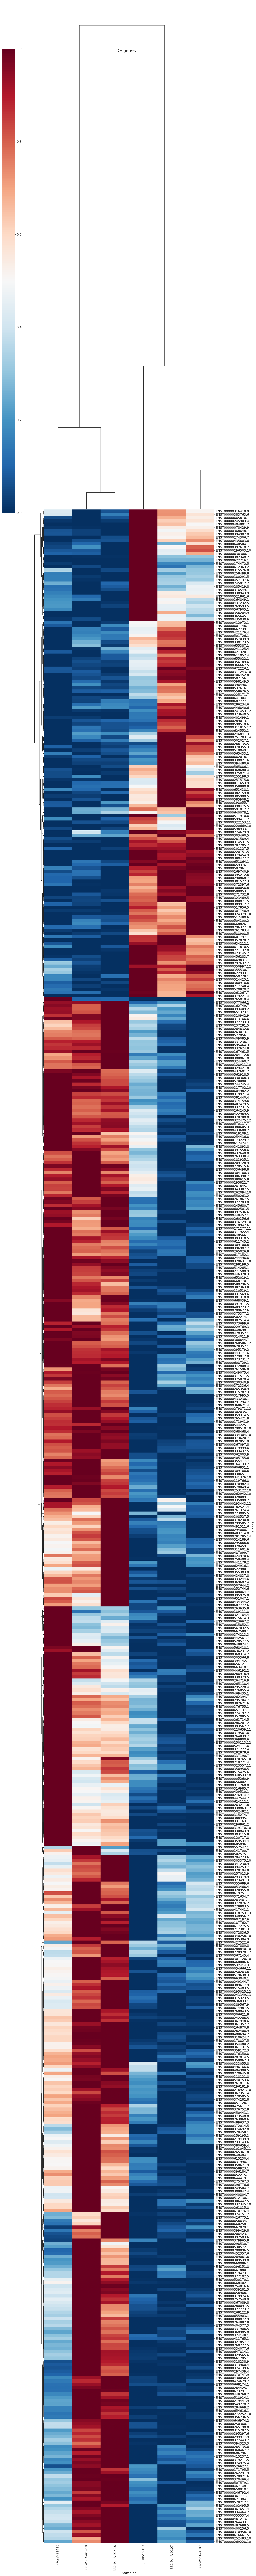

In [24]:
# htseq-count on data 343 and data 405 - BB1-PonA-9107
# htseq-count on data 343 and data 417 - BB2-PonA-9107
# htseq-count on data 343 and data 429 - J-PonA-9107
# htseq-count on data 343 and data 411 - BB1-PonA-91418
# htseq-count on data 343 and data 423 - BB2-PonA-91418
# htseq-count on data 343 and data 435 - J-PonA-91418
new_df = merged_df_pona = merge_datasets("data/cut_downregulated_pona_9107_91418.tabular", 
                                "data/cut_upregulated_pona_9107_91418.tabular",
                                "data/merged_df_pona_9107_91418.csv",
                               ["Genes", "BB1-PonA-9107", "BB2-PonA-9107", "J-PonA-9107", "BB1-PonA-91418", "BB2-PonA-91418", "J-PonA-91418"])
path = "data/merged_df_pona_9107_91418.csv"
normalised_counts_all_genes, y_labels = prepare_data(path)
plot_cluster_genes(normalised_counts_all_genes, "plots/clustered_heatmap_PonA-9107-91418", 'DE genes', y_labels)

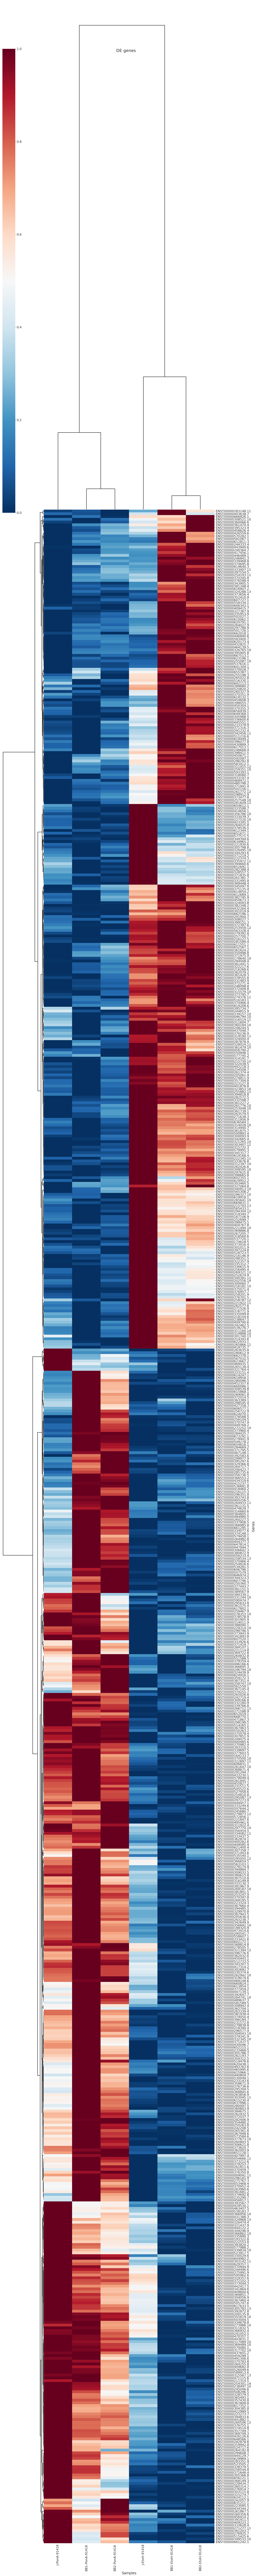

In [25]:
# htseq-count on data 343 and data 408 - BB1-EtoH-91418
# htseq-count on data 343 and data 420 - BB2-EtoH-91418
# htseq-count on data 343 and data 432 - J-EtoH-91418
# htseq-count on data 343 and data 411 - BB1-PonA-91418
# htseq-count on data 343 and data 423 - BB2-PonA-91418
# htseq-count on data 343 and data 435 - J-PonA-91418
new_df = merged_df_pona = merge_datasets("data/cut_downregulated_pona_etoh_91418.tabular", 
                                "data/cut_upregulated_pona_etoh_91418.tabular",
                                "data/merged_df_pona_etoh_91418.csv",
                               ["Genes", "BB1-EtoH-91418", "BB2-EtoH-91418", "J-EtoH-91418", "BB1-PonA-91418", "BB2-PonA-91418", "J-PonA-91418"])
path = "data/merged_df_pona_etoh_91418.csv"
normalised_counts_all_genes, y_labels = prepare_data(path)
plot_cluster_genes(normalised_counts_all_genes, "plots/clustered_heatmap_PonA-EtoH-91418", 'DE genes', y_labels)